## Simple demonstration of calculating segmentation metrics
### And interactive visualisation with Napari

*NOTE(arl)*: the metrics here are calculated as follows in batch mode:
+ `n_true_labels` is the sum of all true labels, etc
+ `IoU` is the mean IoU of all found objects
+ `Jaccard` is the Jaccard index over all found objects
+ `localization_error` is the mean error for all found objects
+ `pixel_identity` is the per image pixel identity

In [1]:
import umetrix

from skimage.io import imread

import napari
from napari.utils import nbscreenshot

In [2]:
# load a ground truth - prediction image pair
p = "../tests/data/unet.tif"
s = imread(p)
y_true = s[-2, ...]
y_pred = s[-1, ...]

### now perform the calculation with strict matching only

In [3]:
result = umetrix.calculate(y_true, y_pred, strict=False, iou_threshold=0.7)

### render these interactively with napari

In [4]:
bboxes, bbox_properties, text_parameters = result.to_napari()

In [5]:
# with napari.gui_qt():
%gui qt
viewer = napari.Viewer()
viewer.add_image(y_pred, colormap='magenta', contrast_limits=[0, 1], name='y_pred')
viewer.add_image(y_true, colormap='green', contrast_limits=[0, 1], name='y_true', blending='additive')
viewer.add_shapes(
    bboxes,
    face_color='transparent',
    edge_color='green',
    properties=bbox_properties,
    text=text_parameters,
    name='bounding box',
)

<Shapes layer 'bounding box' at 0x15017ecb0>

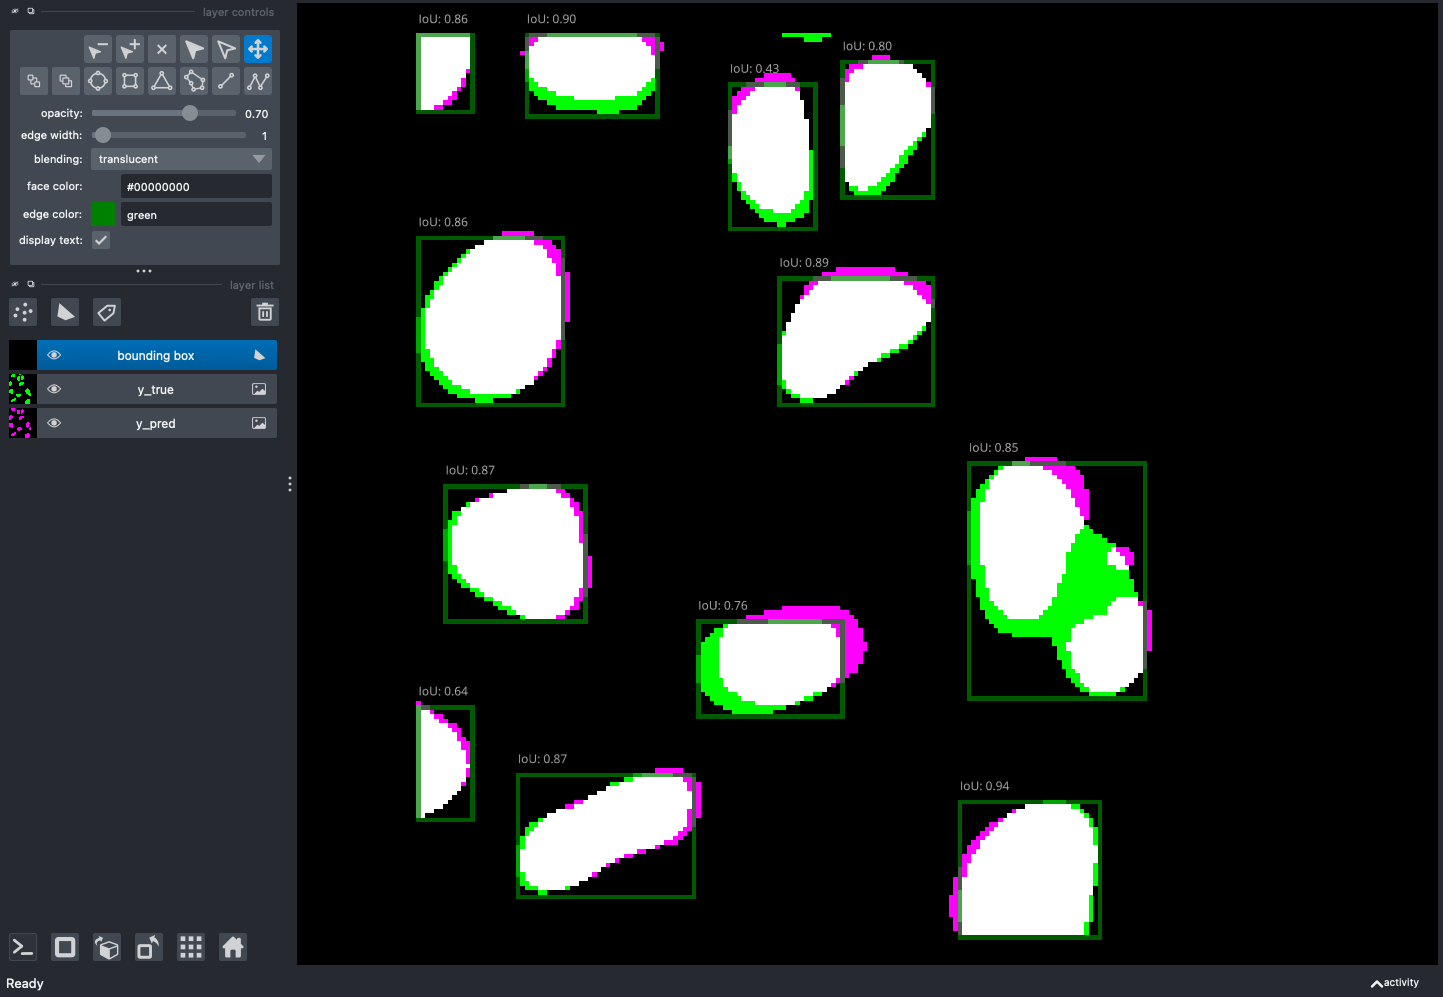

In [6]:
nbscreenshot(viewer)

Metric,
n_true_labels,13
n_pred_labels,14
n_true_positives,12
n_false_positives,2
n_false_negatives,1
IoU,0.807
Jaccard,0.800
pixel_identity,0.959
localization_error,15.524

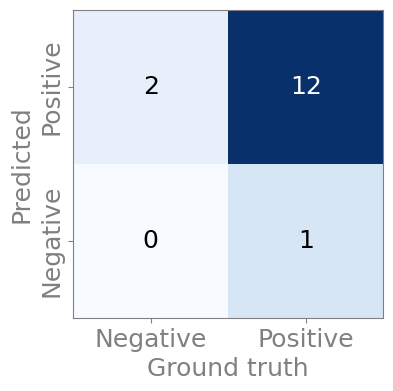

In [7]:
result